## Ejercicio de Feedback: Clustering

# Introducción y planteamiento del problema

"**Ayuda Internacional**" es una ONG humanitaria internacional comprometida con la lucha contra la pobreza y con proporcionar a las personas de países subdesarrollados servicios básicos y ayuda en tiempos de desastres y calamidades naturales. Esta ONG ha logrado recaudar aproximadamente 10 millones de dólares. Este dinero debe ahora asignarse de manera estratégica y eficaz. Por lo tanto, para decidir la selección de los países que más necesitan ayuda, se deben tomar decisiones basadas en datos.

En consecuencia, resulta necesario **categorizar los países utilizando factores socioeconómicos y de salud** que determinen el desarrollo general de cada país. Basándose en estos grupos de países, definidos por sus condiciones, se distribuirán los fondos para brindar asistencia durante desastres y calamidades naturales. Este es un caso claro de clustering, donde se requiere crear grupos de países basados en las diferentes características presentes.

**Objetivo**:


*   Agrupar países en función de características numéricas socioeconómicas.
*   Determinar qué grupos de países requieren ayuda y en qué grado



## Nuestro conjunto de datos




* **country**: Nombre del país.
* **child_mort**: Muertes de niños menores de 5 años por cada 1000 nacidos vivos.
* **exports**: Exportaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **health**: Gasto total en salud per cápita, expresado como porcentaje del PIB per cápita.
* **imports**: Importaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **Income**: Ingreso neto por persona.
* **Inflation**: Tasa de crecimiento anual del PIB total.
* **life_expec**: Número promedio de años que un recién nacido viviría si se mantienen los patrones actuales de mortalidad.
* **total_fer**: Número de hijos que nacerían por mujer si las tasas actuales de fertilidad por edad permanecen constantes.
* **gdpp**: PIB per cápita, calculado como el PIB total dividido entre la población total.




## 1 Importación de librerías

In [3]:
#Es posible que necesitéis estas librerías (y muchas más)
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
!pip install -U kaleido
import kaleido
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.utils import resample
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

## 2 Análisis Exploratorio de los datos

**Ejercicio 1** - Llevar a cabo un procedimiento de EDA para obtener información acerca de los datos:

**1.1**  Declara el tamaño del dataset y muestra algunos registros por pantalla. Muestra los estadísticos (media, desviación típica, min, max...) relevantes de cada una de las variables. Observando el tipo de características, ¿podemos usarlas todas en un algoritmo de agrupación?

**1.2**  Analiza la distribución de cada una de las variables mediante gráficas de densidad y boxplots (se valora utilizar el mínimo código posible para mostrar todas las gráficas). ¿Están bien distribuidas las variables? ¿Qué podemos comentar de este análisis?



In [4]:
#1.1

# Cargar el dataset
df = pd.read_csv('Country-data.csv')

print(f"Tamaño del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")

df.head()


Tamaño del dataset: 167 filas y 10 columnas


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#estadísticos
estadisticas = df.describe().T
display(estadisticas)

# Mostrar información general del dataset
df.info()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:

# Comprobación  valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Comprobación filas duplicadas
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas en el dataset: {duplicados}")


Valores nulos por columna:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Filas duplicadas en el dataset: 0


**¿Podemos usar todas las variables en un algoritmo de agrupación?**

Después de analizar el tipo de variables del dataset, se concluye que todas las columnas, excepto `country`, son variables numéricas. Además, el conjunto de datos no presenta valores nulos ni filas duplicadas, lo que confirma que su estructura está limpia y lista para su uso en un algoritmo de agrupación.

No obstante, antes de aplicar un modelo, será necesario abordar algunos aspectos clave: revisar la posible colinealidad entre variables para evitar redundancia de información, ajustar la escala de los datos y estudiar la presencia de valores atípicos que puedan distorsionar el análisis. A falta de resolver estos puntos, las variables actuales se consideran aptas para continuar con el proceso de agrupación.


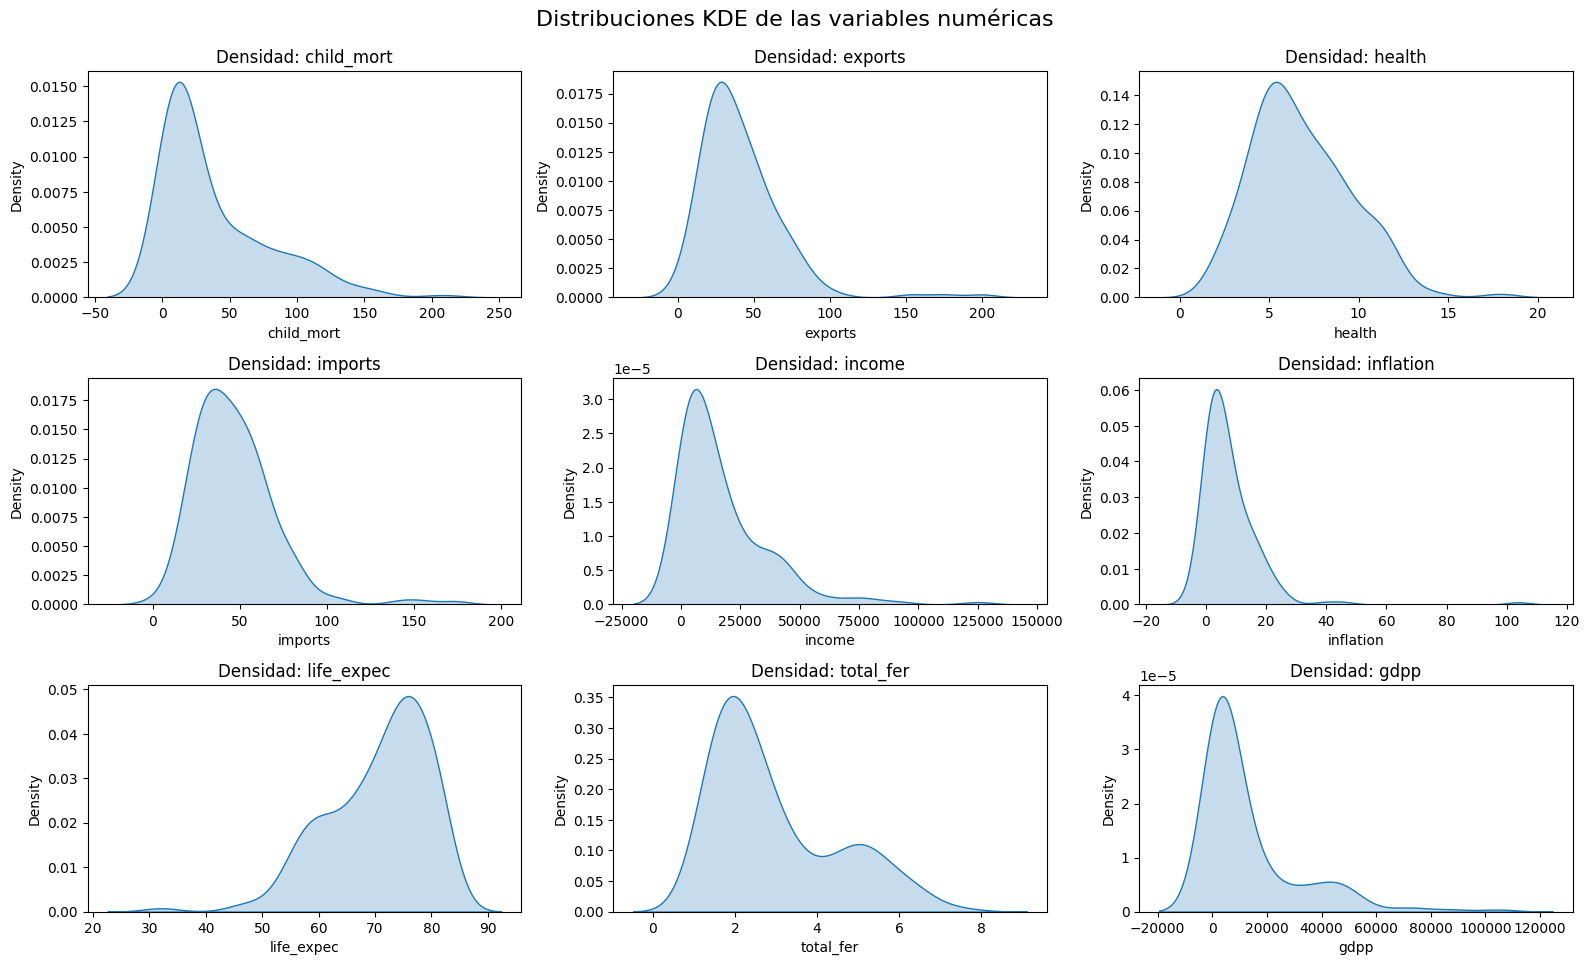

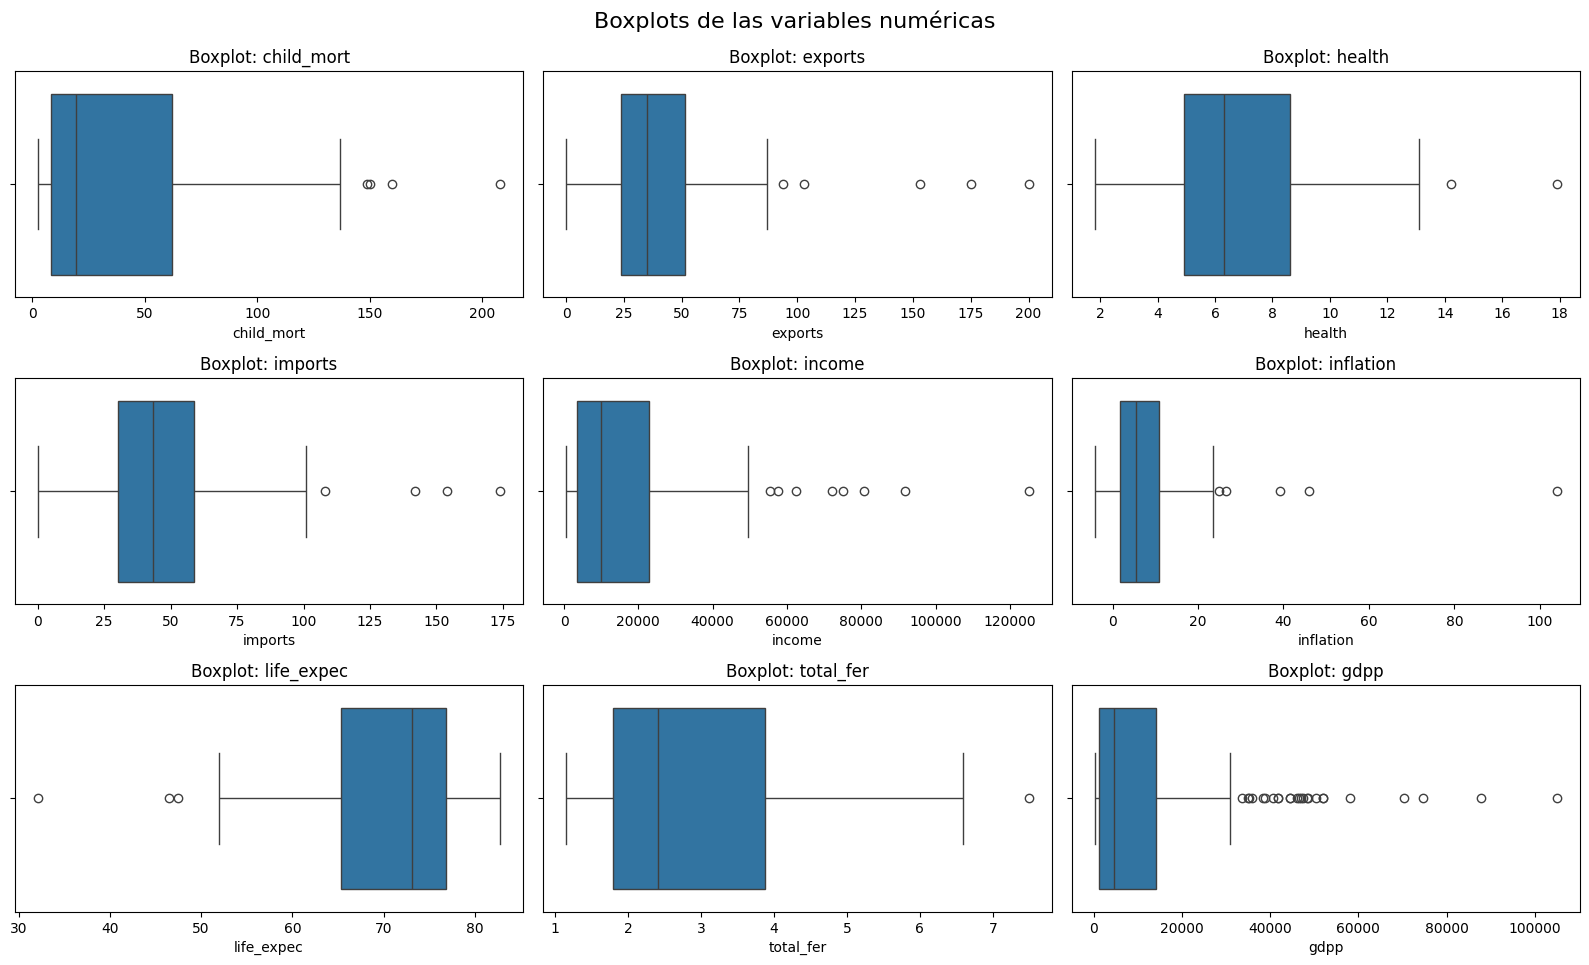

In [7]:
#1.2

# nos quedamos solo con variables numéricas
df_numericas = df.drop(columns='country')

# Crear subplots para KDE
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_numericas.columns):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(df_numericas[col], fill=True)
    plt.title(f'Densidad: {col}')
    plt.tight_layout()
plt.suptitle('Distribuciones KDE de las variables numéricas', fontsize=16, y=1.02)
plt.show()

# Crear subplots para boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_numericas.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df_numericas[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
plt.suptitle('Boxplots de las variables numéricas', fontsize=16, y=1.02)
plt.show()

**¿Están bien distribuidas las variables? ¿Qué podemos comentar de este análisis?**

Las variables no están bien distribuidas en términos estadísticos: la mayoría presentan distribuciones asimétricas, con sesgo positivo y presencia de outliers reales. Esto es especialmente evidente en variables como income, gdpp, inflation y child_mort, donde existen casos extremos que, aunque válidos, podrían afectar el rendimiento de los algoritmos de agrupación si no se tratan.

Este análisis también revela que las variables están en rangos muy distintos entre sí, lo que indica la necesidad de aplicar un método de escalado o estandarización en el preprocesamiento, para evitar que unas variables tengan más peso que otras.

En resumen, aunque las distribuciones no son ideales, los datos reflejan la realidad socioeconómica de estos paises, por lo que pueden usarse en el modelo si se ajustan correctamente.

## 3 Extracción de las características

**Ejercicio 2** - Realizaremos transformaciones en nuestros datos en crudo para obtener las variables con las que realizar el clustering.

* **2.1**  Muestra la matriz de correlaciones por pantalla y comenta resumidamente sus conclusiones.

* **2.2**  Vamos a **agrupar todas nuestras nueve variables en tres grandes indicadores** diferentes: **Salud** (4 variables), **Comercio** (2 variables) y **Finanzas** (3 variables). Definir las agrupaciones en base a lo que significa cada variable. Para construir cada uno de los indicadores, sumaremos cada una de las variables agrupadas en ese indicador dividida por su media (Por ejemplo: Comercio = (variable1/media_variable1) + (variable2/media_variable2)

* **2.3** Una vez construidos los indicadores, tenemos que asegurarnos que los tres estén a la **misma escala**. Para ello tenemos que decidirnos por la **estandarización** o la **normalización**, ambas funciones nativas de SKLearn. Visualiza la distribución de los 3 grandes indicadores, decide que método emplear (estandarización/normalización) y aplícalo a nuestros datos.






**AYUDA ADICIONAL:**

* La normalización se realiza para características cuyos datos no presentan una distribución normal.

* La estandarización se aplica a características con distribución normal, cuyos valores son muy grandes o muy pequeños en comparación con otras características.


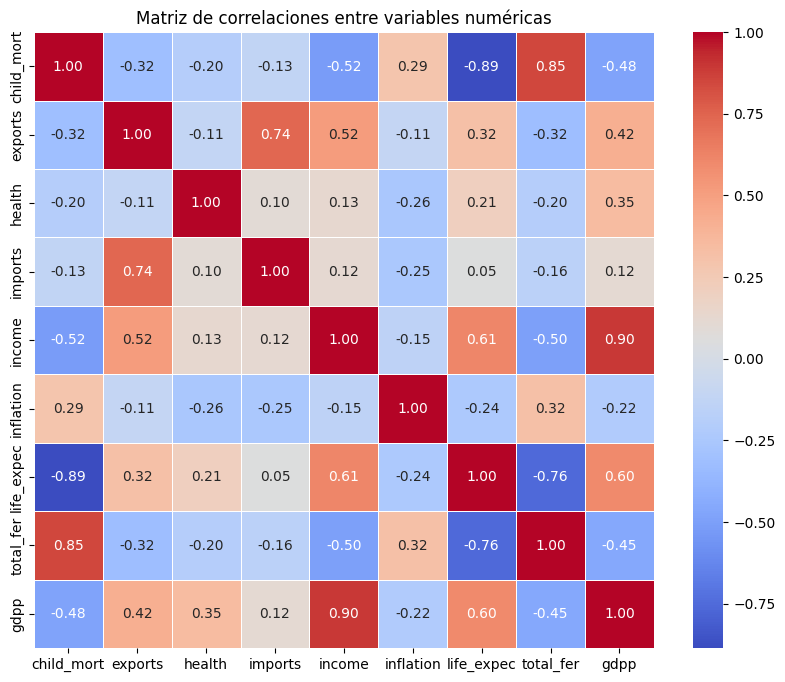

In [8]:
#2.1

# Calcular matriz de correlaciones
matriz_corr = df_numericas.corr()

# Visualización
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlaciones entre variables numéricas')
plt.show()


Las correlaciones más destacadas son:

- `child_mort` y `life_expec`: muy negativa → a mayor mortalidad infantil, menor esperanza de vida.
- `child_mort` y `total_fer`: muy positiva → más hijos por mujer, más mortalidad infantil.
- `income` y `gdpp`: muy positiva → mayor PIB per cápita implica mayor ingreso personal.
- `imports` y `exports`: positiva → países con más comercio tienden a importar y exportar más.

Se observan correlaciones fuertes y coherentes entre las variables anteriores. Estas relaciones confirman que algunas variables están bastante conectadas entre sí y tiene sentido lógico.

In [9]:
#2.2

# Cálculo de medias por variable
medias = df.drop(columns='country').mean()

# Indicadores

# Salud
df['Indicador_Salud'] = (
    (df['health'] / medias['health']) +
    (df['life_expec'] / medias['life_expec']) -
    (df['child_mort'] / medias['child_mort']) -
    (df['total_fer'] / medias['total_fer'])
)

#  Comercio
df['Indicador_Comercio'] = (
    (df['exports'] / medias['exports']) +
    (df['imports'] / medias['imports'])
)

#  Finanzas
df['Indicador_Finanzas'] = (
    (df['income'] / medias['income']) +
    (df['gdpp'] / medias['gdpp']) -
    (df['inflation'] / medias['inflation'])
)

# resumen de los nuevos indicadores
df[['Indicador_Salud', 'Indicador_Comercio', 'Indicador_Finanzas']].describe()


,Indicador_Salud,Indicador_Comercio,Indicador_Finanzas
count,1.670000e+02,167.000000,167.000000
mean,7.445807e-17,2.000000,1.000000
std,1.754392e+00,1.104055,3.042769
min,-5.095854e+00,0.004057,-12.884351
25%,-1.257685e+00,1.289485,-0.638124
50%,4.549830e-01,1.783360,0.166676
75%,1.341733e+00,2.443429,2.064346
max,2.896286e+00,8.575913,12.982664


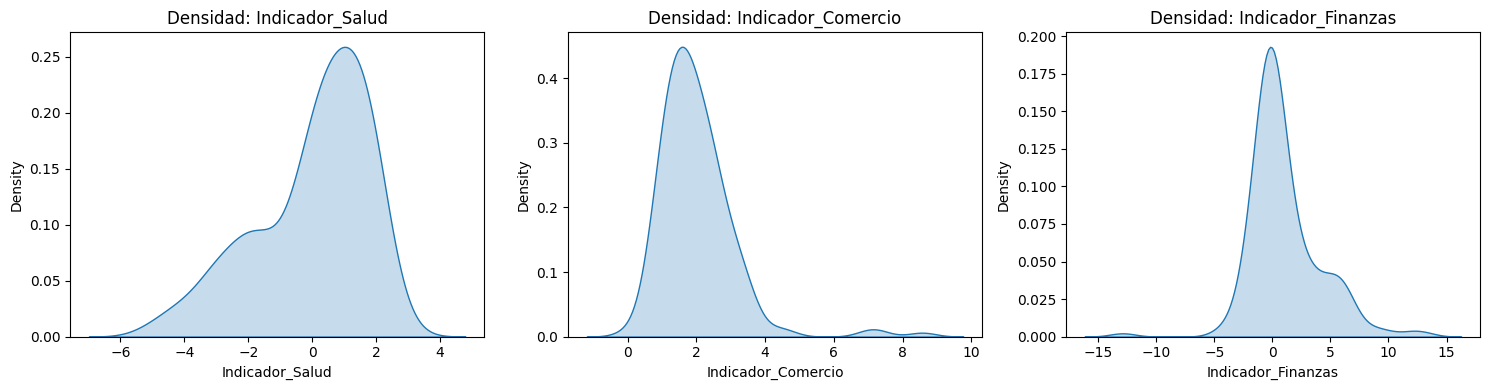

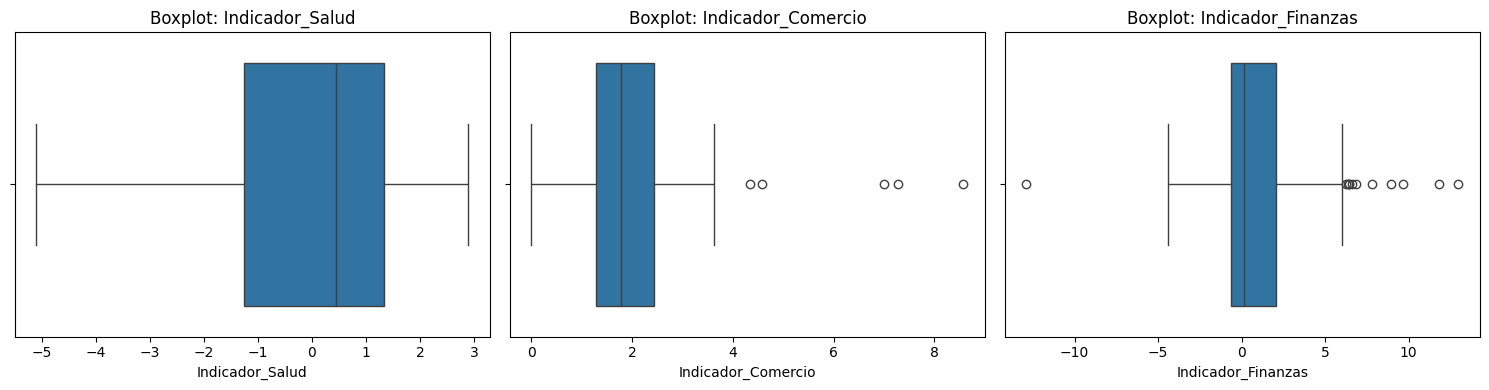

In [10]:
#visualizamos los indicadores

indicadores = ['Indicador_Salud', 'Indicador_Comercio', 'Indicador_Finanzas']

# KDE plots
plt.figure(figsize=(15, 4))
for i, col in enumerate(indicadores):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Densidad: {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(indicadores):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


In [11]:
#2.3
indicadores = ['Indicador_Salud', 'Indicador_Comercio', 'Indicador_Finanzas']

# Escalamos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[indicadores])

# Guardar los resultados en nuevas columnas
df[['Escalado_Salud', 'Escalado_Comercio', 'Escalado_Finanzas']] = df_scaled

df[['Escalado_Salud', 'Escalado_Comercio', 'Escalado_Finanzas']].describe()

,Escalado_Salud,Escalado_Comercio,Escalado_Finanzas
count,1.670000e+02,1.670000e+02,1.670000e+02
mean,3.722904e-17,-1.382793e-16,-1.170055e-16
std,1.003008e+00,1.003008e+00,1.003008e+00
min,-2.913362e+00,-1.813266e+00,-4.576787e+00
25%,-7.190341e-01,-6.454856e-01,-5.399853e-01
50%,2.601193e-01,-1.968125e-01,-2.746939e-01
75%,7.670849e-01,4.028444e-01,3.508473e-01
max,1.655842e+00,5.974059e+00,3.949922e+00


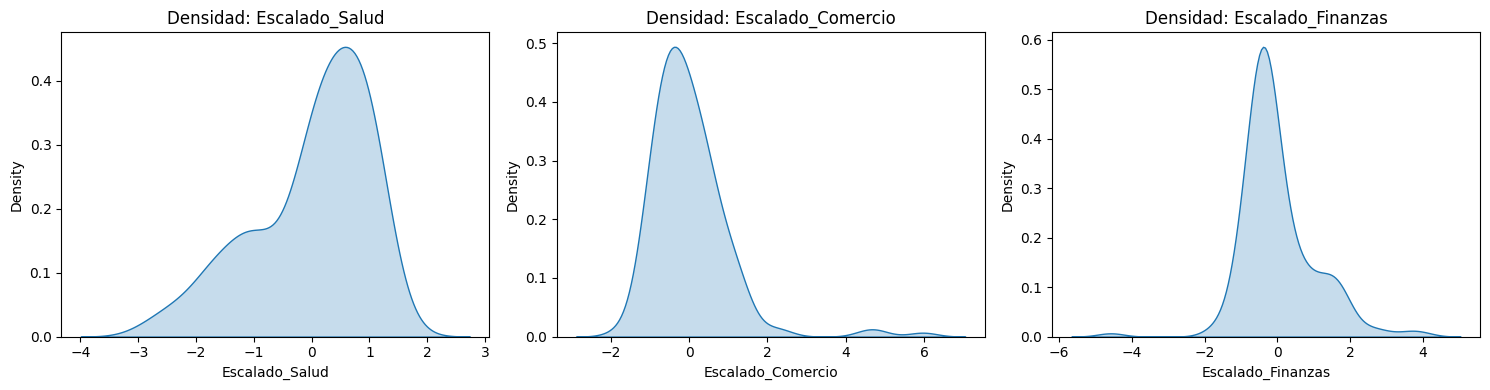

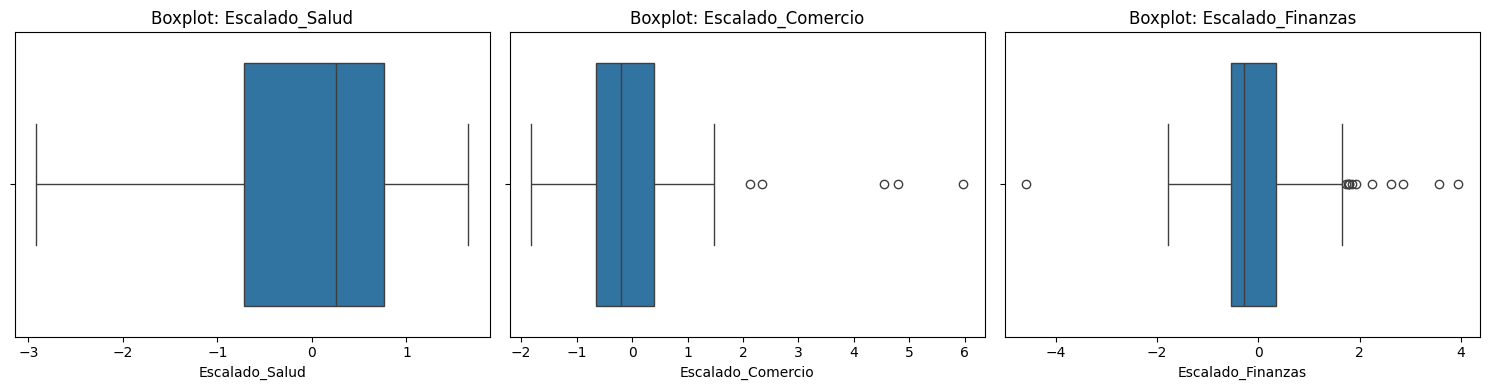

In [12]:
escalados = ['Escalado_Salud', 'Escalado_Comercio', 'Escalado_Finanzas']

# KDE plots
plt.figure(figsize=(15, 4))
for i, col in enumerate(escalados):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Densidad: {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(escalados):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

       Normalizado_Salud  Normalizado_Comercio  Normalizado_Finanzas
count         167.000000            167.000000            167.000000
mean            0.637608              0.232848              0.536759
std             0.219515              0.128800              0.117631
min             0.000000              0.000000              0.000000
25%             0.480243              0.149959              0.473430
50%             0.694537              0.207575              0.504543
75%             0.805490              0.284579              0.577906
max             1.000000              1.000000              1.000000


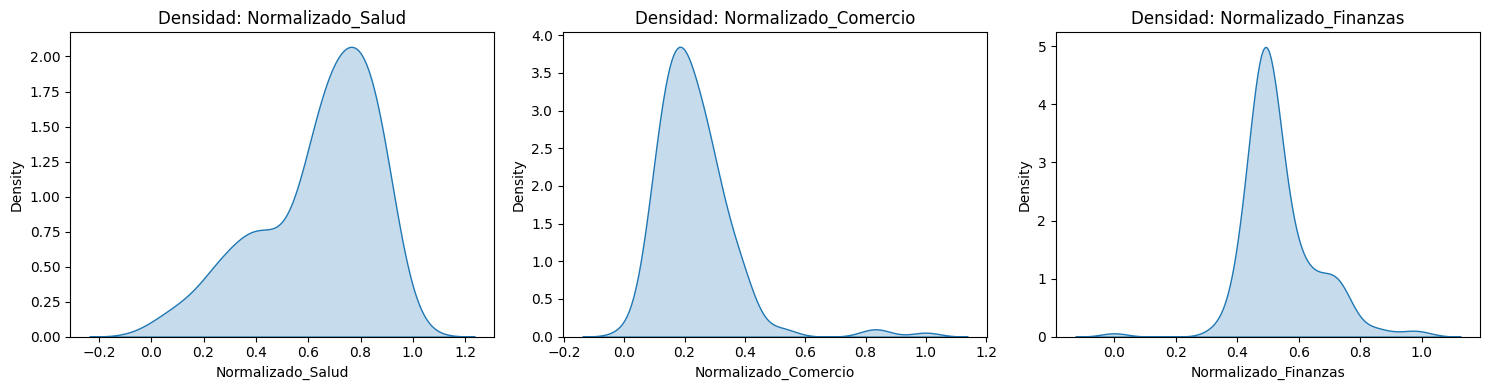

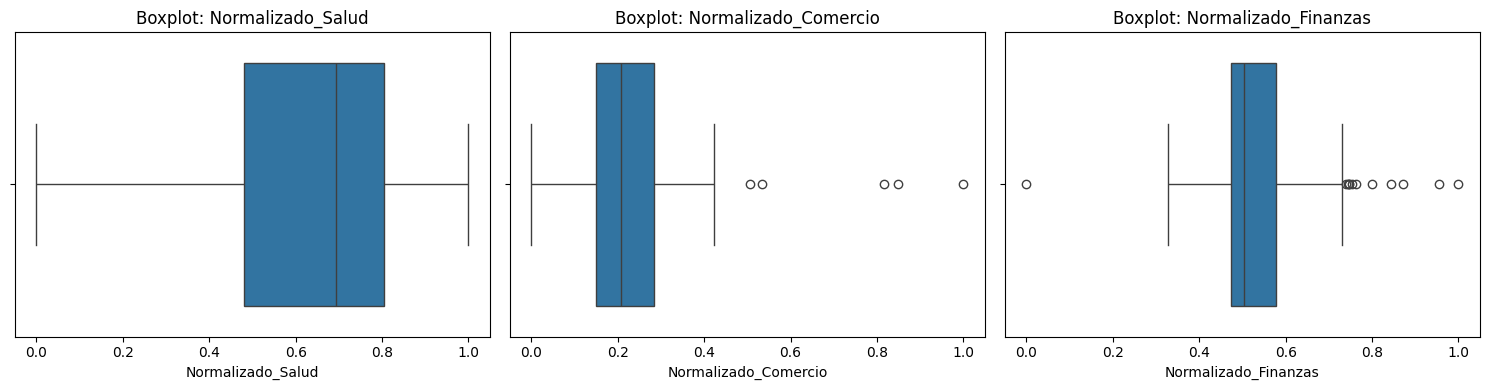

In [13]:
#normalizamos

indicadores = ['Indicador_Salud', 'Indicador_Comercio', 'Indicador_Finanzas']

# Aplicar normalización (Min-Max)
scaler_minmax = MinMaxScaler()
df_minmax = scaler_minmax.fit_transform(df[indicadores])

df[['Normalizado_Salud', 'Normalizado_Comercio', 'Normalizado_Finanzas']] = df_minmax

#  estadísticos
print(df[['Normalizado_Salud', 'Normalizado_Comercio', 'Normalizado_Finanzas']].describe())

# KDE plots
normalizados = ['Normalizado_Salud', 'Normalizado_Comercio', 'Normalizado_Finanzas']

plt.figure(figsize=(15, 4))
for i, col in enumerate(normalizados):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Densidad: {col}')
plt.tight_layout()
plt.show()

#  boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(normalizados):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


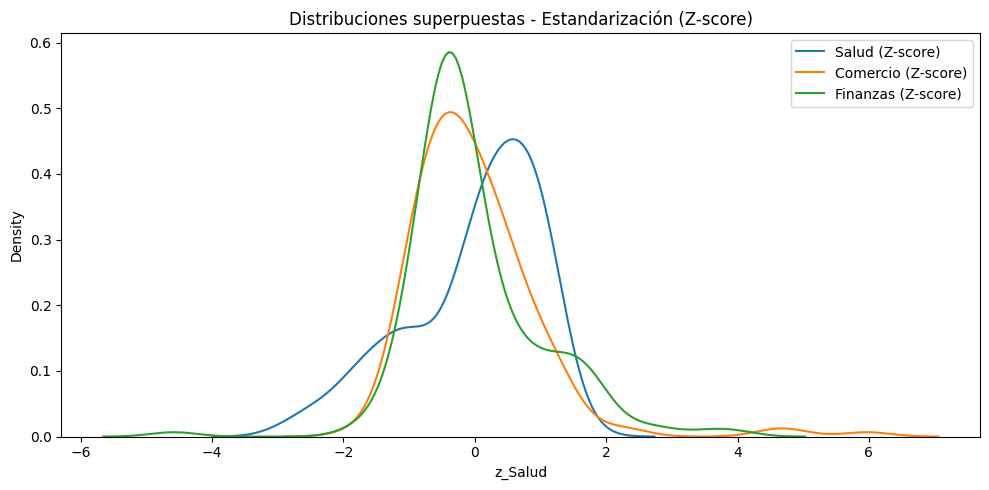

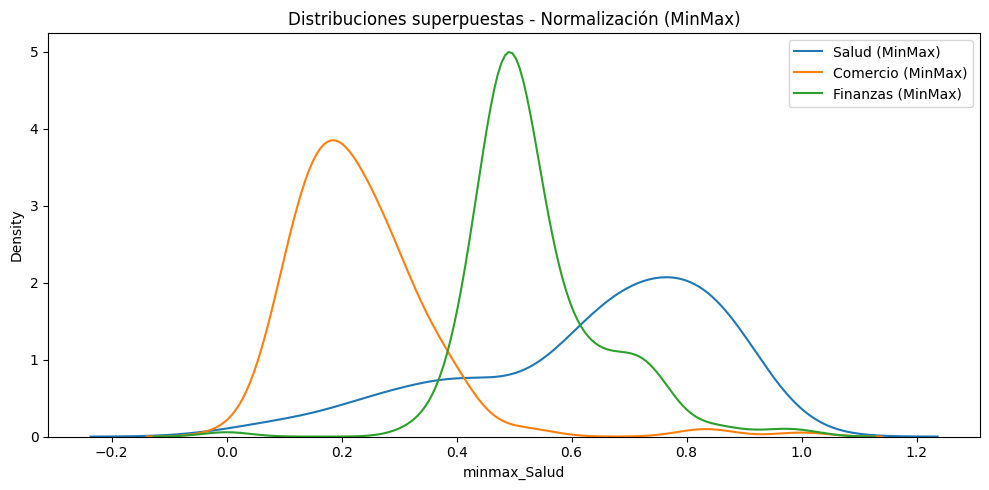

In [14]:

indicadores = ['Indicador_Salud', 'Indicador_Comercio', 'Indicador_Finanzas']

# Estandarización
scaler_std = StandardScaler()
df[['z_Salud', 'z_Comercio', 'z_Finanzas']] = scaler_std.fit_transform(df[indicadores])

# Normalización
scaler_minmax = MinMaxScaler()
df[['minmax_Salud', 'minmax_Comercio', 'minmax_Finanzas']] = scaler_minmax.fit_transform(df[indicadores])

#  KDE plots  superpuestos
plt.figure(figsize=(10, 5))
sns.kdeplot(df['z_Salud'], label='Salud (Z-score)', fill=False)
sns.kdeplot(df['z_Comercio'], label='Comercio (Z-score)', fill=False)
sns.kdeplot(df['z_Finanzas'], label='Finanzas (Z-score)', fill=False)
plt.title("Distribuciones superpuestas - Estandarización (Z-score)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df['minmax_Salud'], label='Salud (MinMax)', fill=False)
sns.kdeplot(df['minmax_Comercio'], label='Comercio (MinMax)', fill=False)
sns.kdeplot(df['minmax_Finanzas'], label='Finanzas (MinMax)', fill=False)
plt.title("Distribuciones superpuestas - Normalización (MinMax)")
plt.legend()
plt.tight_layout()
plt.show()


 **Conclusión del Ejercicio 2**

En este ejercicio, generamos tres indicadores compuestos a partir de las variables originales del dataset:  
`Indicador_Salud`, `Indicador_Comercio` e `Indicador_Finanzas`, siguiendo la fórmula proporcionada en el enunciado.

**Transformación de los Indicadores**

Según la orientación teórica ofrecida por el propio enunciado:

- La normalización se recomienda cuando los datos no siguen una distribución normal.
- La estandarización se utiliza en variables con distribución normal y valores muy grandes o pequeños respecto al resto.

Tras representar gráficamente los indicadores obtenidos, se observaron algunas similitudes con una distribución normal (forma de campana), pero también se detectaron asimetrías, desplazamientos y valores atípicos significativos, por lo que se descartó que se tratara de distribuciones estrictamente normales.

Aplicamos ambas técnicas de transformación y analizamos sus efectos mediante gráficos de densidad y boxplots, incluyendo una visualización conjunta de las tres variables escaladas para cada método y observar diferencias.

 **Decisión final: Optamos por la Normalización**

Pese a que la estandarización produce distribuciones más centradas y homogéneas, decidimos seguir con la normalización, ya que:

- Nos basamos en las definiciones teóricas, que indican aplicar normalización en caso de distribuciones no normales, como es nuestro caso.
- Estamos transformando indicadores agregados, no las variables originales del dataset,y estos no presentan diferencias ni muy grandes ni muy pequeñas entre ellos.
- La normalización conserva la forma relativa de las distribuciones, manteniendo la proporcionalidad interna de cada indicador y facilitando una comparación más interpretativa en los pasos futuros.







## 4 Entrenamiento y evaluación del modelo

**Ejercicio 3**: Una vez tenemos los datos estandarizados, procedemos a aplicar nuestro método de agrupación.

* 3.1 **Selección del algoritmo de clustering**: Argumentar de manera razonada, teniendo en cuenta nuestro problema concreto, que método de agrupación es mejor aplicar en este caso. Existe uno claramente diferenciado.

* 3.2 **Ajuste de hiperparámetro/s**: Una vez seleccionado el modelo, ajusta los hiperparámetro/s para decidir el o los mejores valores del mismo. Recuerda utilizar todas las técnicas vistas en clase y hacer un análisis completo de la situación para poder tomar la decisión con toda la información disponible. La elección de los valor/es de los hiperparámetros deben estar justificados con gran profundidad y evidencias.

* 3.3 **Evaluación de la agrupación**: Utiliza métricas vistas en clase y la representación visual de la agrupación final realizada para valorar la calidad de la misma. Usa las librerías 2D y 3D vistas en las prácticas.





 **3.1 Selección del algoritmo de clustering**

Tras comparar los métodos de agrupación **K-Means** y **DBSCAN**, hemos decidido optar por **K-Means** como el algoritmo más adecuado para resolver nuestro problema de segmentación de países según sus necesidades de ayuda internacional.

Aunque DBSCAN es útil en situaciones donde existen estructuras complejas de densidad o formas irregulares de los clústeres, en nuestro caso no se ajusta bien a la distribución y naturaleza de los datos. En concreto:

- DBSCAN agrupa en función de densidad: esto provoca que, pudiendo haber muchos países con valores socioeconómicos parecidos, los almacene a todos en un mismo clúster debido a una cadena de porximidad. Esto reduce la capacidad del modelo para identificar diferentes niveles de necesidad, que es precisamente el objetivo del análisis.

- Además, DBSCAN suele generar puntos etiquetados como ruido, lo que complica la interpretación y asignación de niveles de ayuda correctos ya que un pais muy rico y muy desarrollado puede ser etiquetado como ruido al igual que uno muy pobre.

- Por el contrario, K-Means puede generar clústeres bien definidos, lo cual facilita la interpretación y priorización de la ayuda. Este enfoque es coherente con nuestra necesidad de agrupar países en niveles de intervención (urgente, moderada, baja, nula o similar).



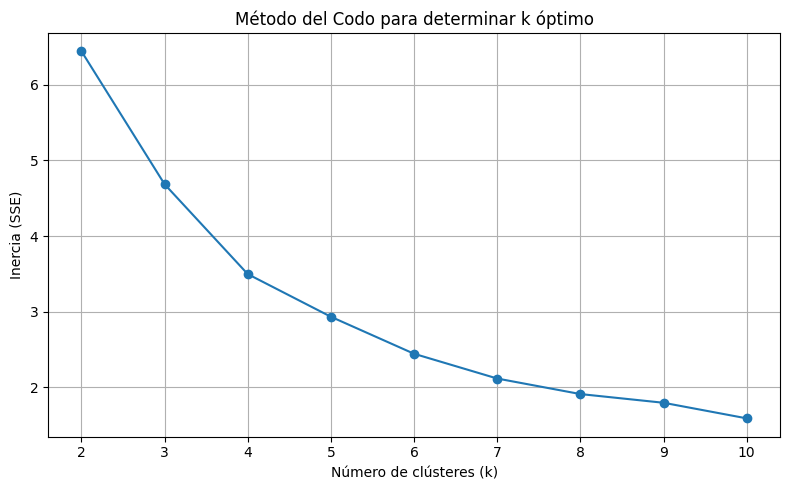

In [15]:
# 3.2
X_kmeans = df[['Normalizado_Salud', 'Normalizado_Comercio', 'Normalizado_Finanzas']]

#Método del codo
inertias = []
ks = range(2, 11)

for k in ks:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    modelo.fit(X_kmeans)
    inertias.append(modelo.inertia_)

# Visualización
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia (SSE)')
plt.title('Método del Codo para determinar k óptimo')
plt.grid(True)
plt.tight_layout()
plt.show()

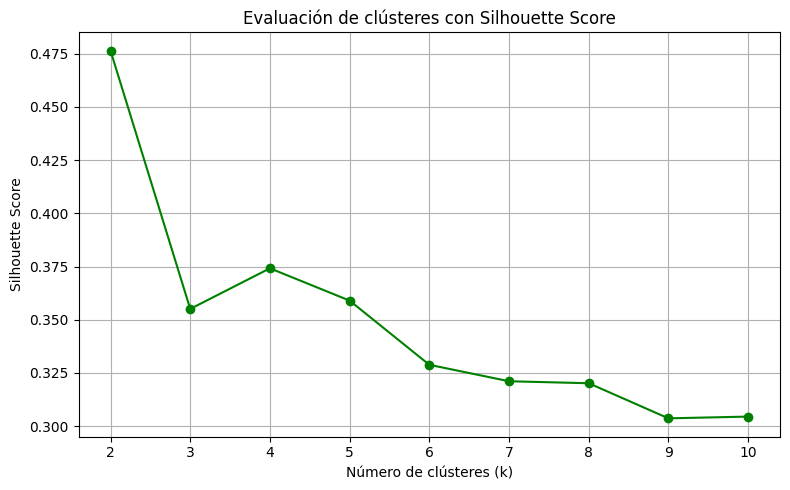

In [16]:
# silhouette score
ks = range(2, 11)
silhouette_scores = []

for k in ks:
    modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = modelo.fit_predict(X_kmeans)
    score = silhouette_score(X_kmeans, etiquetas)
    silhouette_scores.append(score)

# Visualización
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, marker='o', color='green')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluación de clústeres con Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

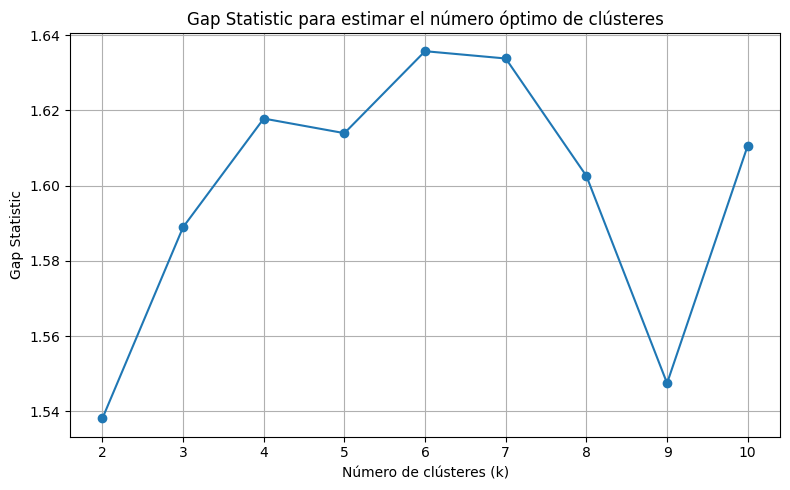

In [17]:
#gap statistic

def calcular_gap_statistic(X, ks=range(2, 11), n_refs=10):
    gaps = []
    s_k = []

    bounding_box = np.array([np.min(X, axis=0), np.max(X, axis=0)])

    for k in ks:
        ref_disps = []

        for _ in range(n_refs):
            # generar muestras aleatorias dentro del mismo rango que X
            X_random = np.random.uniform(
                low=bounding_box[0], high=bounding_box[1], size=X.shape
            )
            modelo_random = KMeans(n_clusters=k, random_state=42, n_init=10)
            modelo_random.fit(X_random)
            ref_disps.append(modelo_random.inertia_)

        modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
        modelo.fit(X)
        disp = modelo.inertia_

        gap = np.mean(np.log(ref_disps)) - np.log(disp)
        gaps.append(gap)
        s_k.append(np.std(np.log(ref_disps)) * np.sqrt(1 + 1 / n_refs))

    return gaps, s_k

# Ejecutamos
ks = range(2, 11)
gaps, sk = calcular_gap_statistic(X_kmeans.values, ks)

# Visualizar
plt.figure(figsize=(8, 5))
plt.plot(ks, gaps, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para estimar el número óptimo de clústeres')
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusión sobre la elección del número óptimo de clústeres (k)**

Tras aplicar las tres métricas de evaluación (Elbow Method, Silhouette Score y Gap Statistic), se observa lo siguiente:

- El **método del codo** muestra que la curva comienza a estabilizarse a partir de `k = 4` o `k = 5`, aunque no de forma totalmente clara.

- El **Silhouette Score** alcanza su máximo en `k = 2`, con una diferencia muy notable respecto al resto de valores. Sin embargo, `k = 2` no era especialmente destacable en el método del codo. Por otro lado, `k = 4` también ofrece un valor de Silhouette relativamente alto, lo que lo convierte en un candidato a tener en cuenta.

- La **Gap Statistic** muestra un primer máximo en `k = 4`, que consideramos más coherente con nuestro análisis, ya que `k = 2` no obtiene un valor destacable. Aunque se observa un segundo pico en `k = 8`, nos quedamos con el primer máximo siguiendo la lógica de las clases de teoría.

Por lo tanto, se decide evaluar y comparar los resultados para `k = 2` y `k = 4`, siendo `k = 4` la opción preferida inicialmente por su equilibrio entre las tres métricas.


In [18]:

X_kmeans = df[['Normalizado_Salud', 'Normalizado_Comercio', 'Normalizado_Finanzas']]

# Clustering con k = 2
modelo_kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster_KMeans_2'] = modelo_kmeans_2.fit_predict(X_kmeans)

# Clustering con k = 4
modelo_kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster_KMeans_4'] = modelo_kmeans_4.fit_predict(X_kmeans)



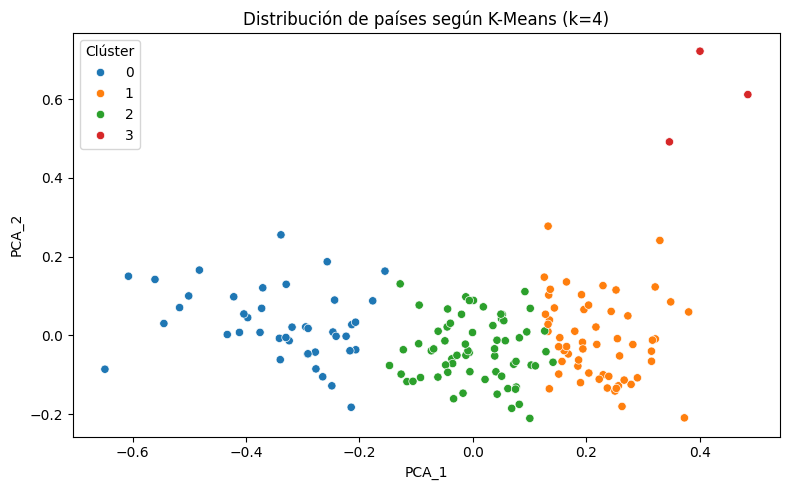

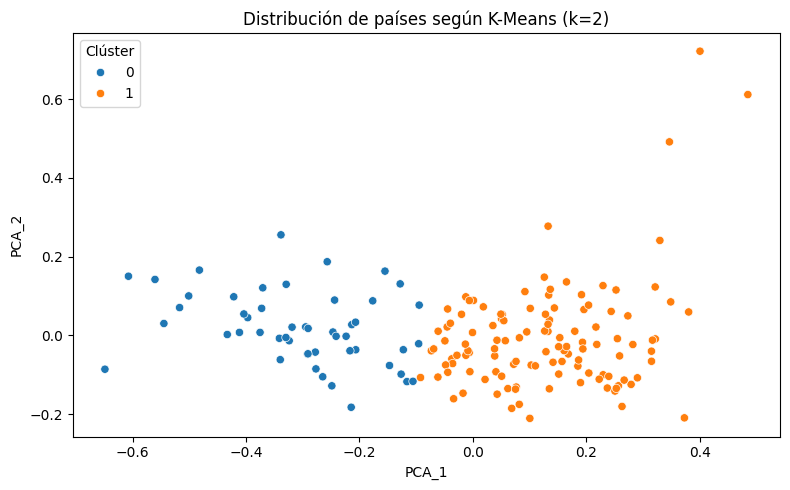

In [19]:

# Aplicar PCA a los datos normalizados
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(X_kmeans)
df['PCA_1'] = pca_resultados[:, 0]
df['PCA_2'] = pca_resultados[:, 1]

# Gráfico  k = 4
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA_1', y='PCA_2', hue='Cluster_KMeans_4', palette='tab10')
plt.title('Distribución de países según K-Means (k=4)')
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()

# Gráfico a k = 2
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='PCA_1', y='PCA_2', hue='Cluster_KMeans_2', palette='tab10')
plt.title('Distribución de países según K-Means (k=2)')
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()


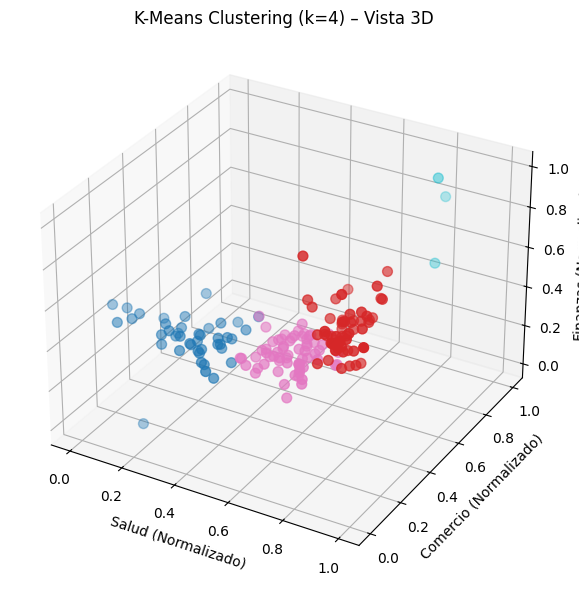

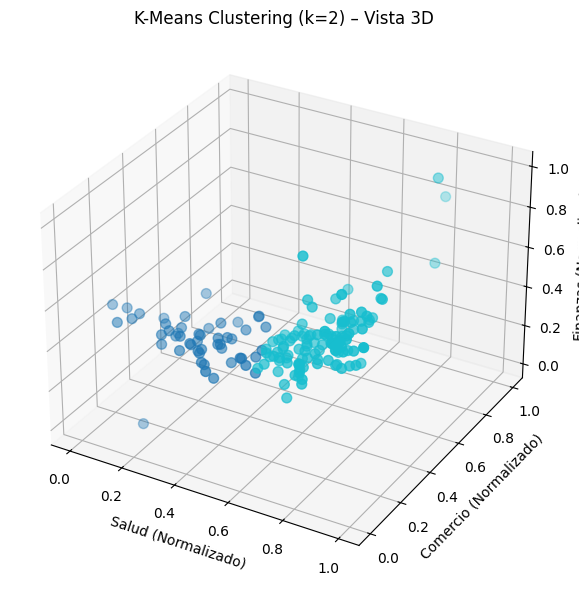

In [20]:
# figura 3D para k = 4
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Normalizado_Salud'],
    df['Normalizado_Comercio'],
    df['Normalizado_Finanzas'],
    c=df['Cluster_KMeans_4'],
    cmap='tab10',
    s=50
)
ax.set_title('K-Means Clustering (k=4) – Vista 3D')
ax.set_xlabel('Salud (Normalizado)')
ax.set_ylabel('Comercio (Normalizado)')
ax.set_zlabel('Finanzas (Normalizado)')
plt.tight_layout()
plt.show()

# figura 3D para k = 2
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['Normalizado_Salud'],
    df['Normalizado_Comercio'],
    df['Normalizado_Finanzas'],
    c=df['Cluster_KMeans_2'],
    cmap='tab10',
    s=50
)
ax.set_title('K-Means Clustering (k=2) – Vista 3D')
ax.set_xlabel('Salud (Normalizado)')
ax.set_ylabel('Comercio (Normalizado)')
ax.set_zlabel('Finanzas (Normalizado)')
plt.tight_layout()
plt.show()


**Conclusión sobre la evaluación del número de clústeres**

Tras aplicar los algoritmos de agrupación K-Means con `k = 2` y `k = 4`, y analizar las visualizaciones tanto en 2D como en 3D, se puede extraer la siguiente conclusión:

- Con `k = 2`, se obtiene una segmentación clara y visualmente bien definida. Los países se agrupan en dos bloques diferenciados, lo que ofrece una interpretación inicial sencilla. Sin embargo, esta clasificación resulta demasiado generalista para el objetivo de nuestro estudio, ya que asignar a todos los países a uno de solo dos niveles de ayuda podría ocultar importantes diferencias internas dentro de cada grupo y habría que hacer nuevas agrupaciones dentro de cad cluster por lo que carecería de sentido nuestro trabajo.

- Con `k = 4`, la distribución revela una segmentación más rica y precisa. Se observa una mejor diferenciación entre los países, lo cual permite capturar mejor la variabilidad existente en los niveles de desarrollo económico, sanitario y comercial. Esta segmentación permite realizar un análisis más detallado y sobre todo útil de cara a definir estrategias diferenciadas de ayuda.

Por tanto, aunque **`k = 2`** muestra una solución coherente, optamos por `k = 4` como el número óptimo de clústeres, ya que proporciona una segmentación más ajustada al contexto del problema.


## 5 Análisis de resultados y conclusión del problema.

**Ejercicio 4**: Interpretar y explicar los resultados obtenidos en base a nuestro problema concreto.

* 4.1 Desde la ONG se tiene conocimiento de que las variables más representativas para decidir si un país necesita o no ayuda son el ingreso neto (income) y la mortalidad infantil (child_mort). Dibuja un boxplot de ambas variables respecto a los clústeres etiquetados para determinar el nivel de ayuda para cada uno de los diferentes grupos. **Nota**: Si hemos obtenido dos clústers finales, los niveles de ayuda serán (necesita ayuda/no necesita ayuda), si son 3 (no necesita ayuda / necesita ayuda moderada/ necesita mucha ayuda) y así sucesivamente.

* 4.2 Utilizando la librería *kaileido* y *plotly.express* **dibuja un mapa mundi** dónde se refleje el nivel de ayuda necesario por país en función de los clústeres realizados. Que cada nivel de ayuda (clúster) tenga un color diferente.


*  4.3 **Conclusiones**: En función de nuestro análisis, ¿qué países debería priorizar Ayuda Internacional para depositar su ayuda y sus recursos? ¿Qué mejoras o implementaciones podríamos hacer a este análisis para mejorar sus resultados? Razona las respuestas de manera argumentada.

/tmp/ipython-input-21-2791916677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KMeans_4', y='income', data=df, palette='Set2')


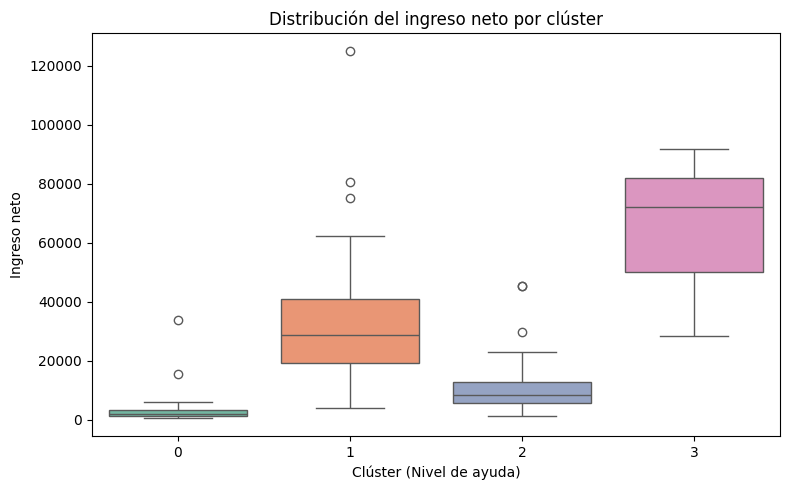

/tmp/ipython-input-21-2791916677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KMeans_4', y='child_mort', data=df, palette='Set2')


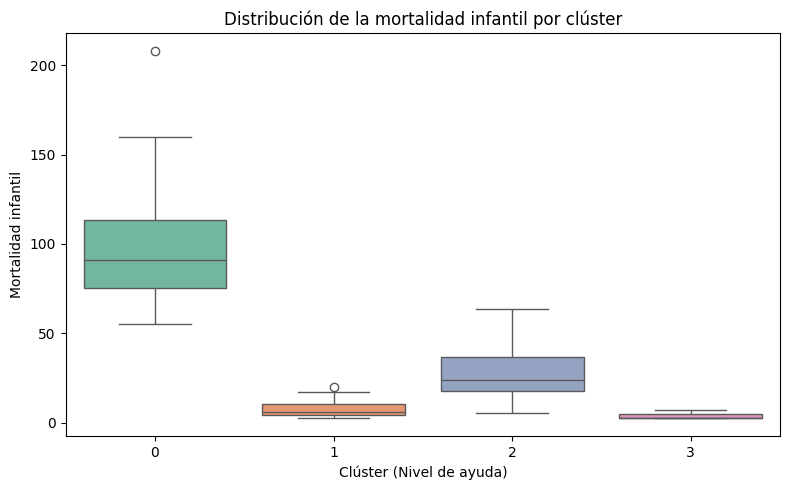

In [21]:
#4.1

# Boxplot: Ingreso neto por clúster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster_KMeans_4', y='income', data=df, palette='Set2')
plt.title('Distribución del ingreso neto por clúster')
plt.xlabel('Clúster (Nivel de ayuda)')
plt.ylabel('Ingreso neto')
plt.tight_layout()
plt.show()

# Boxplot: Mortalidad infantil por clúster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster_KMeans_4', y='child_mort', data=df, palette='Set2')
plt.title('Distribución de la mortalidad infantil por clúster')
plt.xlabel('Clúster (Nivel de ayuda)')
plt.ylabel('Mortalidad infantil')
plt.tight_layout()
plt.show()



Tras analizar la distribución del **ingreso neto** y la **mortalidad infantil** por clúster, se concluye lo siguiente:

- **Clúster 0**: Este grupo requiere **ayuda urgente y prioritaria**. Es el clúster con los ingresos más bajos con diferencia, pero lo más preocupante es que presenta una mortalidad infantil extremadamente elevada. Esta combinación crítica hace que deba ser el foco principal de actuación para la ONG.

- **Clúster 2**: También necesita **ayuda necesaria**, aunque en menor grado que el clúster 0. Sus ingresos siguen siendo bajos, aunque algo superiores, y la mortalidad infantil, aunque notablemente menor, sigue siendo preocupante. Se recomienda hacer un seguimiento activo de estos países para evitar un deterioro de su situación.

- **Clúster 1**: La situación general de este grupo es  más favorable. Aunque hay algunos países con valores elevados de mortalidad infantil, en líneas generales presentan una mortalidad baja y unos ingresos netos más aceptables. La ayuda debería centrarse únicamente en los casos concretos que se desvíen negativamente dentro del clúster por lo que lo calificaría como **ayuda selectiva**.

- **Clúster 3**: Se trata del grupo mucho más estable. Tiene una mortalidad infantil muy baja y unos ingresos netos considerablemente altos. En principio, **no requiere ayuda**.

Este análisis permite a la ONG priorizar recursos de forma eficiente, centrando esfuerzos principalmente en el clúster 0, seguido por el clúster 2.


In [22]:


fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="Cluster_KMeans_4",
    labels={'Cluster_KMeans_4': 'Nivel de ayuda'},
    color_continuous_scale=px.colors.qualitative.Set2
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Nivel de ayuda")
)

fig.show()




### 4.3 Conclusiones

Tras el análisis de agrupamiento utilizando el algoritmo K-Means con `k=4` y empleando variables normalizadas, hemos logrado clasificar a los países en cuatro niveles de necesidad de ayuda internacional.

El **clúster 0** (representado en verde en el mapa) agrupa a países con los ingresos netos más bajos y las tasas de mortalidad infantil más elevadas. Estos países, mayoritariamente situados en África Subsahariana y algunas zonas del sur de Asia, presentan una situación de emergencia humanitaria. Por tanto, deben ser considerados como prioridad absoluta para recibir ayuda y recursos de cooperación internacional.

El **clúster 2** (amarillo) incluye países con ingresos también reducidos, aunque algo superiores al clúster 0, y con una mortalidad infantil más moderada. Su situación sigue siendo delicada, por lo que se recomienda que reciban apoyo continuado*, especialmente enfocado en la prevención del empeoramiento de sus indicadores.

El **clúster 1** (morado) se caracteriza por ingresos medios y baja mortalidad infantil en la mayoría de los casos. Aunque algunos países dentro de este grupo podrían presentar cierta vulnerabilidad, no representan una urgencia generalizada, y la ayuda debería enfocarse en casos concretos que se alejen de la media del grupo.

Por último, el **clúster 3** (gris) representa a países con altos ingresos y muy baja mortalidad infantil. Estos países no requieren ayuda internacional, salvo en situaciones puntuales de emergencia o catástrofes naturales.


### Propuestas de mejora

- **Ampliar el número de variables analizadas**, incluyendo indicadores de educación, acceso a agua potable, guerras activas o recientes, catástrofes naturales recientes o conflicto armado..
- **Utilizar datos actualizado** para detectar cambios con la máxima brevedad posible.
- **Comparar los resultados con flujos reales de ayuda internacional** para validar el modelo y ajustar si es necesario estos presupuestos.
- **Explorar modelos temporales y predictivos**, que anticipen qué países podrían entrar en situación de riesgo si no se actúa adecuadamentea.

Con estas mejoras se podría optimizar la asignación de recursos y mejoraría este estudio complementándolo en gran medida.
